In [50]:
import numpy as np
import matplotlib.pyplot as plt

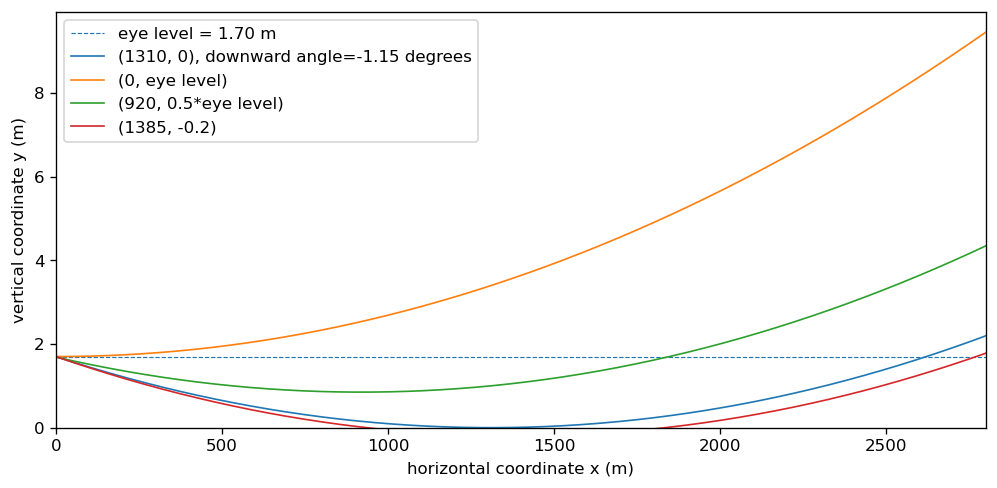

In [162]:
dndT = -9.9e-7 # 1 / K
C_0 = -2 # K / m
L,N = 2800,1000
dx = L/N
n_0 = 1.00027
eyeLevel=1.7 # m

x_coos = np.linspace(0,L,N)
z_coos0 = np.zeros_like(x_coos)
z_coos1 = np.zeros_like(x_coos)
z_coos2 = np.zeros_like(x_coos)
z_coos3 = np.zeros_like(x_coos)

def n(z):
    return n_0 + dndT * C_0 * z

def z_coordinate(x_coordinate, x_t, z_t):
    return n(z_t) * (dndT*C_0)**-1 * np.cosh((x_coordinate-x_t)*(dndT*C_0)/(n(z_t))) - n_0 / (dndT * C_0)

z_coos0 = z_coordinate(x_coos, 1310, 0)
z_coos1 = z_coordinate(x_coos, 0, eyeLevel)
z_coos2 = z_coordinate(x_coos, 920, eyeLevel/2)
z_coos3 = z_coordinate(x_coos, 1385, -0.2)

#critical angle if eye level is 1.70 m
crit_angle = round(np.rad2deg(np.tan((z_coos0[10] - z_coos0[0]) / 10*dx)), 2)

plt.figure(figsize=(10,4.5), dpi=120)
plt.axhline(y=eyeLevel, linestyle='--', lw=0.7, label='eye level = 1.70 m')
plt.plot(x_coos, z_coos0, lw=1, label=f'(1310, 0), downward angle={crit_angle} degrees')
plt.plot(x_coos, z_coos1, lw=1, label='(0, eye level)')
plt.plot(x_coos, z_coos2, lw=1, label='(920, 0.5*eye level)')
plt.plot(x_coos, z_coos3, lw=1, label='(1385, -0.2)')
plt.legend()
plt.ylabel('vertical coordinate y (m)')
plt.xlabel('horizontal coordinate x (m)')
plt.ylim(bottom=0)
plt.xlim(left=0, right=L)
plt.savefig('infMirImage.jpeg')